In [1]:
import re
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from matplotlib import style, colors
from matplotlib import gridspec
import random
import string
import math

matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)

use all calls from strelka: this is prefered since this takes into consideration of all soamtic calls:snvs and indels, high/moderate/low/modifier impacts.

In [3]:
def file_len(fname):
    i = 0
    with open(fname) as f:
        for line in f:
            if not re.match("^##", line):
                i+=1
    return i - 1

In [4]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/124_patients_bam_vcf.txt'
df = pd.read_csv(f1, sep='\t', index_col='patient')
df.head(2)

,HIV_status,DNA_lib,source,status,RNA_lib,ribodepleted_lib,DNA_bam,RNA_bam,DNA_single_vcf,paired_mpileup_vcf,...,other_vcf,DNA_tc,RNA_tc,cnv,bbt_transcriptome,bbt_genome,bbt_transcriptome_other_bacterial,bbt_genome_other_bacterial,bbt_transcriptome_other_viral,bbt_genome_other_viral
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,Positive,A37234,HTMCP_124,Malignant,A37700,A56295,/projects/analysis/analysis22/A37234/merge_bwa...,/projects/analysis/analysis22/IX3433/C67GDANXX...,/projects/analysis/analysis22/A37234/merge_bwa...,NaN,...,NaN,55.0,55.0,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...
HTMCP-03-06-02002,Negative,A37235,HTMCP_125,Malignant,A37701,A56296,/projects/analysis/analysis22/A37235/merge_bwa...,/projects/analysis/analysis22/IX3432/C67GDANXX...,/projects/analysis/analysis22/A37235/merge_bwa...,NaN,...,NaN,70.0,70.0,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...


In [5]:
ndf = df[['strelka_snv_vcf', 'strelka_indel_vcf']].dropna()
ndf.head(2)

,strelka_snv_vcf,strelka_indel_vcf
patient,,
HTMCP-03-06-02001,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...
HTMCP-03-06-02002,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...


In [6]:
ndf.shape

(124, 2)

In [7]:
ndf['snv_counts'] = ndf['strelka_snv_vcf'].apply(lambda x: file_len(x))
ndf['indel_counts'] = ndf['strelka_indel_vcf'].apply(lambda x: file_len(x))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/szong/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f737e4989691>", line 1, in <module>
    ndf['snv_counts'] = ndf['strelka_snv_vcf'].apply(lambda x: file_len(x))
  File "/home/szong/anaconda3/lib/python3.6/site-packages/pandas/core/series.py", line 2355, in apply
    mapped = lib.map_infer(values, f, convert=convert_dtype)
  File "pandas/_libs/src/inference.pyx", line 1569, in pandas._libs.lib.map_infer (pandas/_libs/lib.c:66440)
  File "<ipython-input-7-f737e4989691>", line 1, in <lambda>
    ndf['snv_counts'] = ndf['strelka_snv_vcf'].apply(lambda x: file_len(x))
  File "<ipython-input-3-f5fbc6ef0654>", line 4, in file_len
    for line in f:
  File "/home/szong/anaconda3/lib/python3.6/codecs.py", line 318, in decode
    def decode(self, input, final=False):
KeyboardInterrupt

During handling of the above exc

KeyboardInterrupt: 

In [ ]:
ndf['strelka_mutations'] = ndf.snv_counts + ndf.indel_counts
ndf.drop(['strelka_snv_vcf', 'strelka_indel_vcf'], axis=1, inplace=True)
ndf.head(2)

In [ ]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/124_patients_strelka_snvs_indels_counts.txt'
# ndf.to_csv(of)

In [ ]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/124_patients_strelka_snvs_indels_counts.txt'
df_strelka = pd.read_csv(of, index_col='patient')
df_strelka.head(2)

In [ ]:
# df_strelka['log10_snv'] = np.log10(df_strelka.snv +1)
df_strelka['log10_sum'] = np.log10(df_strelka['strelka_mutations'])

In [ ]:
df_strelka = df_strelka.query('patient != "HTMCP-03-06-02061"')
assert ('HTMCP-03-06-02061' in df_strelka.index) == False

In [ ]:
df_strelka.head(2)

In [13]:
# fixed histology
f2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/HIV_cervical_analysis_master_tables_20171206.xls'
df2 = pd.read_excel(f2, sheetname='meta', index_col='patient')
df2.head(2)

,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments
patient,,,,,
HTMCP-03-06-02001,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN
HTMCP-03-06-02002,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN


In [14]:
f3 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/clinic_data_extracted.txt'
df3 = pd.read_csv(f3, sep='\t', index_col='bcr_patient_barcode')
df3.head(2)

,age_at_diagnosis,tumor_grade,ajcc_tumor_clinical_ct,clinical_stage,cd4_counts_at_diagnosis,hiv_rna_load_at_diagnosis,birth_days_to,menopause_status,height_cm_at_diagnosis,weight_kg_at_diagnosis,...,ecog_score,nadir_cd4_counts,cd4_counts_at_diagnosis.1,hiv_rna_load_at_diagnosis.1,histologic_diagnosis,haart_therapy_prior_to_dx,haart_therapy_at_dx,keratinization_squamous_cell,days_to_hiv_diagnosis,patient_id
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,56.0,G2,T2b,Stage IIB,337.0,34.0,NaN,Post (prior bilateral ovariectomy OR >12 mo si...,158.0,44.5,...,1,NaN,337.0,34.0,Squamous Cell Carcinoma; Non-Keratinizing,YES,YES,Non-keratinizing squamous cell carcinoma,NaN,2001
HTMCP-03-06-02002,62.0,G3,T1b1,Stage IB1,NaN,NaN,-22934.0,Post (prior bilateral ovariectomy OR >12 mo si...,159.0,70.2,...,0,NaN,NaN,NaN,Squamous Cell Carcinoma; Non-Keratinizing,NaN,NaN,Non-keratinizing squamous cell carcinoma,NaN,2002


merge mutation and clinical data

In [15]:
dfm = pd.merge(df_strelka, df2, left_index=True, right_index=True)
dfm.head(2)

,snv_counts,indel_counts,strelka_mutations,log10_sum,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments
patient,,,,,,,,,
HTMCP-03-06-02001,25732,1242,26974,4.430945,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN
HTMCP-03-06-02002,15964,697,16661,4.221701,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN


In [16]:
non_dup_cols = df3.columns.difference(dfm.columns)

In [17]:
non_dup_cols

Index(['age_at_diagnosis', 'ajcc_tumor_clinical_ct', 'birth_days_to',
       'cd4_counts_at_diagnosis', 'cd4_counts_at_diagnosis.1',
       'clinical_stage', 'days_to_hiv_diagnosis', 'ecog_score',
       'haart_therapy_at_dx', 'haart_therapy_prior_to_dx',
       'height_cm_at_diagnosis', 'histologic_diagnosis',
       'history_hormonal_contraceptives_use', 'hiv_rna_load_at_diagnosis',
       'hiv_rna_load_at_diagnosis.1', 'karnofsky_score',
       'keratinization_squamous_cell', 'live_birth_pregnancy_count',
       'menopause_status', 'nadir_cd4_counts', 'patient_id',
       'pregnancies_count_induced_abortion', 'pregnancies_count_miscarriage',
       'tobacco_smoking_history_indicator', 'total_pregnancy_count',
       'tumor_grade', 'weight_kg_at_diagnosis'],
      dtype='object')

In [18]:
dfm = pd.merge(dfm, df3[non_dup_cols], left_index=True, right_index=True, how='left')

In [19]:
dfm.shape

(123, 36)

In [20]:
dfm.head(3)

,snv_counts,indel_counts,strelka_mutations,log10_sum,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments,age_at_diagnosis,...,live_birth_pregnancy_count,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,26974,4.430945,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN,56.0,...,5.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2001.0,NaN,1.0,1.0,6.0,G2,44.5
HTMCP-03-06-02002,15964,697,16661,4.221701,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN,62.0,...,8.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2002.0,3.0,NaN,1.0,11.0,G3,70.2
HTMCP-03-06-02003,7914,483,8397,3.924124,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN,39.0,...,4.0,Pre (<6 months since LMP AND no prior bilatera...,NaN,2003.0,NaN,NaN,1.0,5.0,G2,56.2


In [21]:
dfm[dfm.age_at_diagnosis.isnull()].shape

(30, 36)

In [22]:
dfm['reanne_HIV_status'].value_counts()

Positive    74
Negative    49
Name: reanne_HIV_status, dtype: int64

In [23]:
dfm['reanne_Putative_histology'].value_counts()

Squamous    102
Adeno        21
Name: reanne_Putative_histology, dtype: int64

In [24]:
# colors = ['red' if i=="Positive" else 'blue' for i in dfm['HIV_status']]
# dfm.plot('log10_snv', 'log10_indel', kind='scatter', c=colors)

In [25]:
dfm.head(2)

,snv_counts,indel_counts,strelka_mutations,log10_sum,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments,age_at_diagnosis,...,live_birth_pregnancy_count,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,26974,4.430945,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN,56.0,...,5.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2001.0,NaN,1.0,1.0,6.0,G2,44.5
HTMCP-03-06-02002,15964,697,16661,4.221701,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN,62.0,...,8.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2002.0,3.0,NaN,1.0,11.0,G3,70.2


In [26]:
of2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutation_load_clinic.txt'
# dfm.to_csv(of2, sep='\t')

In [27]:

dfm = dfm[dfm.age_at_diagnosis.notnull()]

In [28]:
dfm[dfm.age_at_diagnosis.isnull()]

,snv_counts,indel_counts,strelka_mutations,log10_sum,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments,age_at_diagnosis,...,live_birth_pregnancy_count,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis
patient,,,,,,,,,,,,,,,,,,,,,


In [29]:
# drop outliers to see if this results in better box plot and /or mann whiteney u test results (nonparametric test, should not matter)
# result still significant p=0.030, intead of p= 0.007
# dfm.drop(['HTMCP-03-06-02026', 'HTMCP-03-06-02007', 'HTMCP-03-06-02261', 'HTMCP-03-06-02262'], inplace=True)

different mutation burden in HIV + and - patients

In [9]:
f =  '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutation_load_clinic.txt'
df = pd.read_csv(f, index_col='patient', sep='\t')
df.head(2)

df.tmp = df.reanne_HIV_status.apply(lambda x: '+' if x == 'Positive' else '-')

assert (df.tmp.value_counts() == pd.Series({'+':74, '-':49})).all()

df['combo'] = df.reanne_Putative_histology + df.tmp

'tmp' in df.columns

False

In [11]:
df.head(2)

,snv_counts,indel_counts,strelka_mutations,log10_sum,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments,age_at_diagnosis,...,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis,combo
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,26974,4.430945,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN,56,...,Post (prior bilateral ovariectomy OR >12 mo si...,[Not Available],2001.0,[Not Available],1,1,6.0,G2,44.5,Squamous+
HTMCP-03-06-02002,15964,697,16661,4.221701,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN,62,...,Post (prior bilateral ovariectomy OR >12 mo si...,[Not Available],2002.0,3,[Not Available],1,11.0,G3,70.2,Squamous-


In [10]:
df.columns

Index(['snv_counts', 'indel_counts', 'strelka_mutations', 'log10_sum',
       'reanne_HIV_status', 'HPV_status', 'Clinical_histology',
       'reanne_Putative_histology', 'comments', 'age_at_diagnosis',
       'ajcc_tumor_clinical_ct', 'birth_days_to', 'cd4_counts_at_diagnosis',
       'cd4_counts_at_diagnosis.1', 'clinical_stage', 'days_to_hiv_diagnosis',
       'ecog_score', 'haart_therapy_at_dx', 'haart_therapy_prior_to_dx',
       'height_cm_at_diagnosis', 'histologic_diagnosis',
       'history_hormonal_contraceptives_use', 'hiv_rna_load_at_diagnosis',
       'hiv_rna_load_at_diagnosis.1', 'karnofsky_score',
       'keratinization_squamous_cell', 'live_birth_pregnancy_count',
       'menopause_status', 'nadir_cd4_counts', 'patient_id',
       'pregnancies_count_induced_abortion', 'pregnancies_count_miscarriage',
       'tobacco_smoking_history_indicator', 'total_pregnancy_count',
       'tumor_grade', 'weight_kg_at_diagnosis', 'combo'],
      dtype='object')

In [34]:
group_cols = ['reanne_HIV_status', 'reanne_Putative_histology', 'combo']
value_col = 'strelka_mutations'
titles = ['HIV status', 'putative histology', 'histology + HIV status']

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


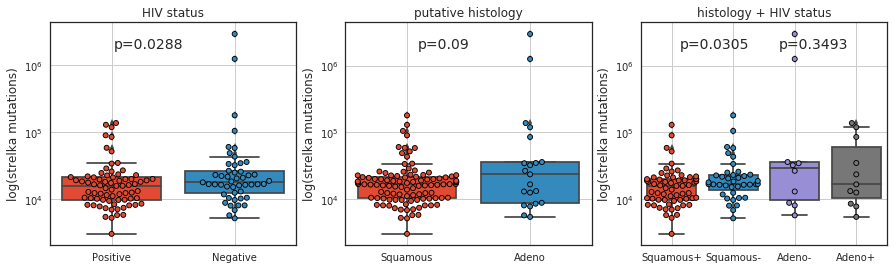

In [49]:

# gene = 'SF3B1'
# boxplot overlaps individual data point
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w', figsize=(15,9))

    gs = gridspec.GridSpec(int(len(group_cols)/3.0)+1, 3)
    p_values = {}
    for k, col in enumerate(group_cols):
#         titles = group_cols[k]
        group_col = col
        categories = sorted(df[group_col].unique().tolist(), reverse=True) 
#         print(k, col)
        ax = fig.add_subplot(gs[k])
        _ = ax.set_yscale("log")
       
        _ = sns.swarmplot(x=group_col, y=value_col, data=df, edgecolor="black", linewidth=.9)
        _ = sns.boxplot(x=group_col, y=value_col, data=df, saturation=1, ax=ax)

        grps = {}
        # overlay actuall data point
        for i, cat in enumerate(categories):
            grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[value_col]

        if len(categories) == 2:
            # statistical test for 1st grp
            sts, p = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
            p = round(p, 4)
            _ = ax.text(0.4 , 0.90,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14)
        elif len(categories) == 4:
            # statistical test for 1st grp
            for i in [0, 2]:
                sts, p = ss.mannwhitneyu(grps[i], grps[i+1], use_continuity=True, alternative=None)
                p = round(p, 4)
                _ = ax.text(0.3 + i*.2 , 0.90,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14)
            
#         ax.tick_params(axis='x', labelsize=18) #specify x tick label size
#         _ = ax.set_xticks(range(position+1))
#         _ = ax.set_xticklabels(categories, rotation=0)
        _ = ax.set_title('{}'.format(titles[k]), fontsize=12)
#         _ = ax.set_xlim(xmin=-0.5)
#         _= ax.set_ylabel('spicing events', fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('log(strelka mutations)')
        ax.grid(True)

#     plt.suptitle('', fontsize=14)       
    of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutation_load.png'
    plt.savefig(of, dpi=200, box_inches='tight')
plt.show()
plt.close()

range(2, 1)

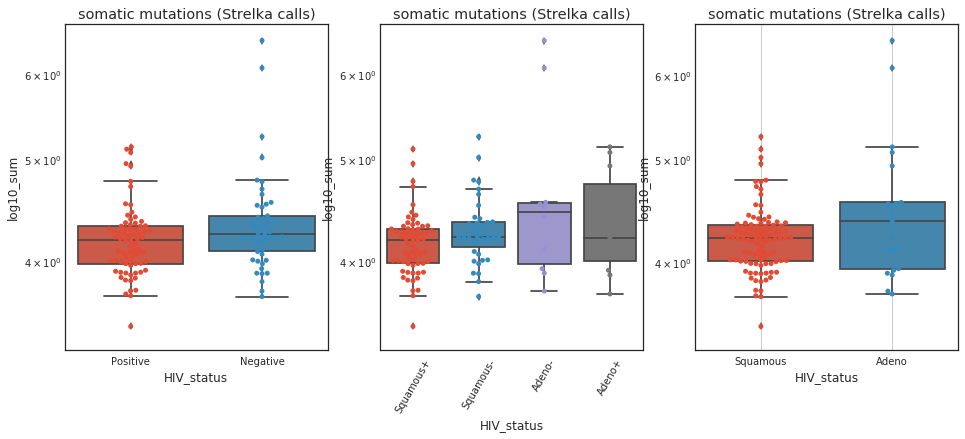

In [12]:
# boxplot
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w', figsize=(16,6))
    
    x1 = 'reanne_HIV_status'
    x2 = 'combo'
    x3 = 'reanne_Putative_histology'
    y = 'log10_sum'
    ax1 = plt.subplot(131)
    ax1.set_yscale("log")
    sns.swarmplot(x1, y, data=df)
    sns.boxplot(x1, y, data=df)
    ax1.set_title("somatic mutations (Strelka calls)")
    ax1.set(xlabel='HIV_status')
    
    ax2 = plt.subplot(132)
    ax2.set_yscale("log")
    sns.swarmplot(x2, y, data=df)
    sns.boxplot(x2, y, data=df)
    plt.xticks(rotation=60)
    ax2.set(xlabel='HIV_status')
    ax2.set_title("somatic mutations (Strelka calls)")
    
    ax3 = plt.subplot(133)
    ax3.set_yscale("log")
    sns.swarmplot(x3, y, data=df)
    sns.boxplot(x3, y, data=df)
    ax3.set(xlabel='HIV_status')
    ax3.set_title("somatic mutations (Strelka calls)")
    ax3.grid(True)
    of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutations_load_HIV_plots.png'    
    plt.savefig(of)
    plt.show()
    plt.close()

# below are outdated

0 0 is 0.1039964486558819
0 1 is 0.248274809376615


/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


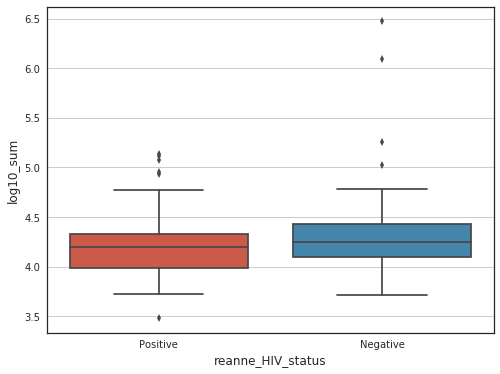

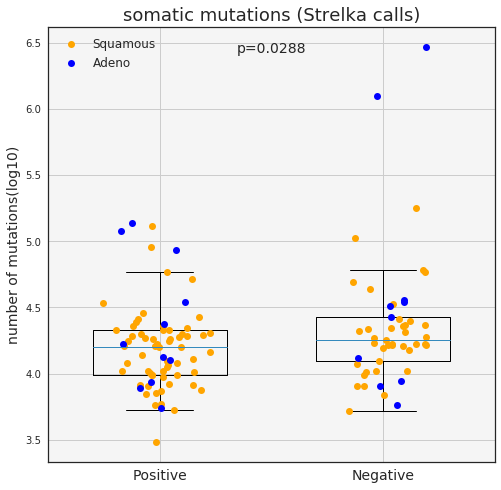

In [37]:
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    sns.boxplot('reanne_HIV_status', 'log10_sum', data=df)

    value_cols = ['log10_sum']
    titles = ['somatic mutations (Strelka calls)']
    # boxplot overlaps individual data point
    fig, axes = plt.subplots(1, 1, figsize=(8, 8))

    # axes = axes.ravel()
    # group_col = 'combo'
    group_col = 'reanne_HIV_status'
    tissue_col = 'reanne_Putative_histology'
    categories = sorted(df[group_col].unique().tolist(), reverse=True) 
    tissues = sorted(df[tissue_col].unique().tolist(), reverse=True)
    p_values = {}
    for k, col in enumerate(value_cols):
    #     ax = axes[k]
        ax=axes
        value_col = col
        for position, cat in enumerate(categories):
            _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                       positions=[position], widths=(0.6), showfliers=False
                      )

        np.random.seed(0)
        grps = {}
        # overlay actuall data point based on tissue types
        for i, cat in enumerate(categories):
            # add jitter and specify maker facecolor and edgecolor               
            for j, tissue in enumerate(tissues):
                y = (df.query('{0}=="{1}" & {2}=="{3}"'.format(group_col, cat, tissue_col, tissue))[value_col])
                x = np.random.normal(i, 0.1, size=len(y))
        #         ax.scatter(x, y, s=30)
                lb = '' if i == 0 else tissue
                _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][j], 
                               mec='k', ms=7, marker="o", linestyle="None", label=lb)
                grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]
    #         show the unequal variance of each group, not equal
            print('{0} {1} is {2}'.format(k, i, np.var(grps[i])))
        # statistical test for 1st grp
        stats, p_U = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
    #     statsT, p_T = ss.ttest_ind(grps[0], grps[1])
        p_U = round(p_U, 4)
    #     p_T = round(p_T, 4)
        _ = ax.text(0.5, 0.95,'p={}'.format(p_U), ha='center', va='center', transform=ax.transAxes, size=14) 
    #     _ = ax.text(0.3, 0.90,'p_Ttest={}'.format(p_T), ha='center', va='center', transform=ax.transAxes, size=14)     

        _ = ax.set_facecolor('whitesmoke') #specify plot backgroup color
        _ = ax.tick_params(axis='x', labelsize=14) #specify x tick label size
        _ = ax.set_xticks(range(position+1))
        _ = ax.set_xticklabels(categories, rotation=0, fontsize=14)
    #     ax.set_title(col)
        _ = ax.set_title('{}'.format(titles[k]), fontsize=18)
        _ = ax.set_xlim(xmin=-0.5)
        _= ax.set_ylabel('number of mutations(log10)', fontsize=14)
        ax.grid(True)
        _ = ax.legend(scatterpoints=1,
                  loc='upper left',
                  ncol=1,
                  fontsize=12)
    plt.suptitle('', fontsize=14)  
    of1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/107_patients/mutations_load_HIV_plots_1.png'
    # plt.savefig(of1, dpi=200)

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


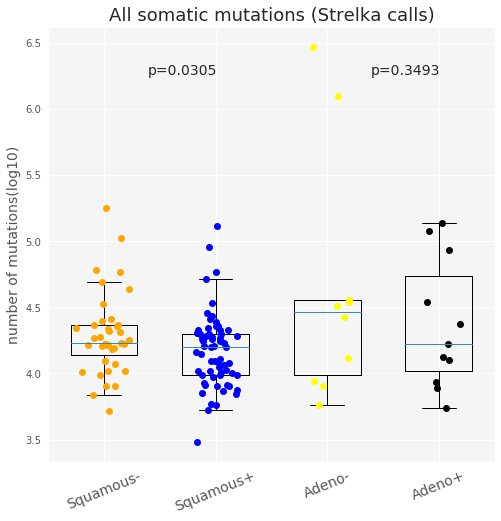

In [38]:

# separate into squamous and adeno, test HIV status difference.
value_cols = ['log10_sum']
titles = ['All somatic mutations (Strelka calls)']
# boxplot overlaps individual data point
fig, axes = plt.subplots(1,1, figsize=(8, 8))
# axes = axes.ravel()
group_col = 'combo'
# group_col = 'HIV_status'
categories = sorted(df[group_col].unique().tolist(), reverse=True) 
p_values = {}
for k, col in enumerate(value_cols):
    ax = axes
    value_col = col
    for position, cat in enumerate(categories):
        _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                   positions=[position], widths=(0.6), showfliers=False
                  );

    np.random.seed(0)
    
    grps = {}
    # overlay actuall data point
    for i, cat in enumerate(categories):
        # add jitter and specify maker facecolor and edgecolor
        y = df[value_col][df[group_col]==cat]
        x = np.random.normal(i, 0.1, size=len(y))
#         ax.scatter(x, y, s=30)
        _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][i], mec='k', ms=7, marker="o", linestyle="None")
        grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]

    # statistical test for 1st grp
    stats, p = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
    p = round(p, 4)
    _ = ax.text(0.3, 0.9,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14) 
    
    # statistical test fro 2nd grp
    stats, p = ss.mannwhitneyu(grps[2], grps[3], use_continuity=True, alternative=None)
    p = round(p, 4)
    _ = ax.text(0.8, 0.9,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14)    
    
    ax.set_facecolor('whitesmoke') #specify plot backgroup color
    ax.tick_params(axis='x', labelsize=18) #specify x tick label size
    _ = ax.set_xticks(range(position+1))
    _ = ax.set_xticklabels(categories, rotation=22, fontsize=14)
#     ax.set_title(col)
    _ = ax.set_title('{}'.format(titles[k]), fontsize=18)
    _ = ax.set_xlim(xmin=-0.5)
    _= ax.set_ylabel('number of mutations(log10)', fontsize=14)
    ax.grid(True)

plt.suptitle('', fontsize=14)       

of1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/107_patients/mutations_load_HIV_plots_2.png'
# plt.savefig(of1, dpi=200)

look at immune related mutations

In [29]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/immune_related_mutations.txt'
df = pd.read_csv(f, header=None, sep='\t')
df = df[[0,5]]
df['patient'] = df[5].apply(lambda x: x.replace('_malignant', ''))
df = df.drop(5, axis=1)
df.columns = ['gene', 'patient']
df.head(2)

,gene,patient
0,A2M,HTMCP-03-06-02396
1,A2M,HTMCP-03-06-02042


In [30]:
df = pd.DataFrame(df.groupby('patient').count()).drop(['HTMCP-03-06-02007', 'HTMCP-03-06-02026']).reset_index()

In [31]:
f = '/home/szong/projects/META_2018/Master_Sample_table_14X292_Feb27_2018_sz.xls'
meta = pd.read_excel(f, sheetname='HTMCP CaCx epi')
meta = meta[['Biospecimen ID', 'HIV status']]
meta['patient'] = meta['Biospecimen ID'].apply(lambda x: '-'.join(['HTMCP-03-06', x.split('-')[3]]))
meta = meta.drop('Biospecimen ID', axis=1)
meta.head(2)

,HIV status,patient
0,negative,HTMCP-03-06-02007
1,negative,HTMCP-03-06-02026


In [32]:
dfm = pd.merge(df, meta, left_on='patient', right_on='patient')
dfm.head()

,patient,gene,HIV status
0,HTMCP-03-06-02001,9,positive
1,HTMCP-03-06-02002,6,negative
2,HTMCP-03-06-02006,6,negative
3,HTMCP-03-06-02012,18,negative
4,HTMCP-03-06-02020,1,positive


/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


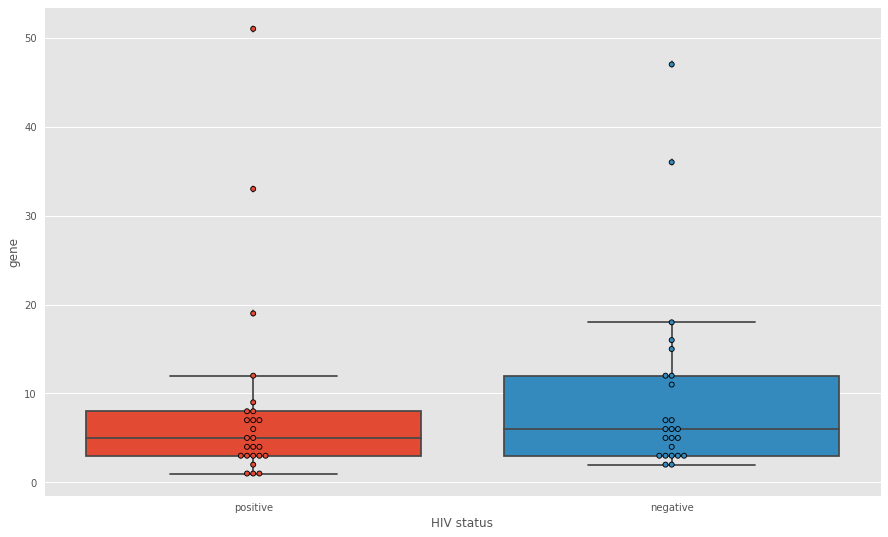

In [38]:
group_col = 'HIV status'
value_col = 'gene'
fig = plt.figure(facecolor='w', figsize=(15,9))
ax = fig.add_subplot(111)
_ = sns.swarmplot(x=group_col, y=value_col, data=dfm, edgecolor="black", linewidth=.9)
_ = sns.boxplot(x=group_col, y=value_col, data=dfm, saturation=1, ax=ax)


In [33]:
dfm.groupby('HIV status')[['gene']].sum()

,gene
HIV status,
negative,237
positive,209


make a plot comparing gene mutation frequency between TCGA and NCI, percentage of patients carry mutations for each gene

In [2]:
f0 = '/projects/trans_scratch/validations/workspace/szong/Cervical/HIV_cervical_validation_target_candidates_20190309_added.xls'
df0 = pd.read_excel(f0, sheetname='proposed_genes')
df0.head()

,gene,number_HTMCP_patients_with_mutation,reason_picked_for_capture,suggest_exclude,average_RPKM
0,MUC4,87,mutated_in_3_or_more_HTMCP_patient,YES,19.873095
1,TTN,49,mutated_in_3_or_more_HTMCP_patient,YES,0.010591
2,AHNAK2,43,mutated_in_3_or_more_HTMCP_patient,YES,20.152050
3,PIK3CA,41,tcga_and_landscape_significantly_mutated,NaN,4.438437
4,AC007731.1,33,mutated_in_3_or_more_HTMCP_patient,YES,0.000377


In [4]:
df0 = df0.query('suggest_exclude != "YES"')
df0.head()

,gene,number_HTMCP_patients_with_mutation,reason_picked_for_capture,suggest_exclude,average_RPKM
3,PIK3CA,41,tcga_and_landscape_significantly_mutated,NaN,4.438437
12,TPRXL,22,mutated_in_3_or_more_HTMCP_patient,NaN,2.755383
13,HRNR,21,mutated_in_3_or_more_HTMCP_patient,NaN,0.135752
14,CRIPAK,20,mutated_in_3_or_more_HTMCP_patient,NaN,2.946960
15,MLL3,20,mutated_in_3_or_more_HTMCP_patient,NaN,3.677492


In [6]:
validation_genes = df0.gene
# validation_genes

In [7]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/tcga_variants/tcga.genome.wustl.edu_CESC.IlluminaGA_DNASeq_curated.Level_2.1.0.0.somatic.maf'
df1 = pd.read_csv(f1, sep='\t')
df1.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,gene_name_source,gene_name_source.1,tumor_ref_reads,tumor_var_reads,tumor_vaf,normal_ref_reads,normal_var_reads,normal_vaf,dbSNP_rsID,GMAF
0,A1BG,1,genome.wustl.edu,37,19,58864353,58864353,+,Missense_Mutation,SNP,...,HGNC,ENSG00000121410,93,80,46.24,170,0,0.0,NaN,NaN
1,A1BG-AS1,503538,genome.wustl.edu,37,19,58864179,58864179,+,RNA,SNP,...,HGNC,ENSG00000268895,81,12,12.90,30,0,0.0,NaN,NaN
2,A1CF,29974,genome.wustl.edu,37,10,52587925,52587925,+,Missense_Mutation,SNP,...,HGNC,ENSG00000148584,19,10,34.48,34,0,0.0,NaN,NaN
3,A1CF,29974,genome.wustl.edu,37,10,52601652,52601652,+,Missense_Mutation,SNP,...,HGNC,ENSG00000148584,29,29,50.00,36,0,0.0,NaN,NaN
4,A2M,2,genome.wustl.edu,37,12,9262517,9262517,+,Missense_Mutation,SNP,...,HGNC,ENSG00000175899,113,55,32.74,95,0,0.0,NaN,NaN


In [8]:
df1.gene_name.nunique()

16453

In [9]:
df1.Variant_Classification.unique()

array(['Missense_Mutation', 'RNA', 'Silent', 'Nonsense_Mutation',
       'Splice_Site', 'In_Frame_Del', 'Frame_Shift_Del', 'Frame_Shift_Ins',
       'Nonstop_Mutation', 'In_Frame_Ins'], dtype=object)

In [10]:
df1.shape

(46547, 66)

In [11]:
df1 = df1.query('Variant_Classification!="Silent"')

In [12]:
df1.shape

(36782, 66)

In [13]:
df1.gene_name.nunique()

15006

In [14]:
df2 = pd.DataFrame(df1[['gene_name', 'Tumor_Sample_Barcode']].groupby('gene_name').count())

In [15]:
df2.shape

(15006, 1)

In [16]:
df2['freq'] = df2/df1.Tumor_Sample_Barcode.nunique()

In [17]:
df2.sort_values('freq').head(2)

,Tumor_Sample_Barcode,freq
gene_name,,
A1BG,1,0.005155
LOC401127,1,0.005155


In [18]:
df2.shape

(15006, 2)

In [19]:
df_tcga = df2.copy()

NCI mutations

In [89]:
# snv summary file
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/HIGH_MODERATE_SNV_summary_with_normal_with_AF_filtered_somatic.tsv'
df1 = pd.read_csv(f, sep='\t', usecols=['gene', 'patient_ID'])
df1.head(2)

,gene,patient_ID
0,SAMD11,HTMCP-03-06-02007_malignant
1,SAMD11,HTMCP-03-06-02214_malignant


In [90]:
# indel summary file
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/HIGH_MODERATE_INDEL_summary_with_normal_strelka_indels_only.tsv'
df2 = pd.read_csv(f, sep='\t', usecols=['gene', 'patient_ID'])
df2.head(2)

,gene,patient_ID
0,PCNT,HTMCP-03-06-02448_malignant
1,MLL3,HTMCP-03-06-02097_malignant


In [91]:
dfc = pd.concat([df1, df2])
dfc['patient'] = dfc.patient_ID.str.replace('_malignant', '')
dfc.drop('patient_ID', inplace=True, axis=1)

In [92]:
dfd = dfc[~dfc.patient.isin(['HTMCP-03-06-02061'])].drop_duplicates()

In [93]:
dfd.shape

(34547, 2)

In [94]:
dfd.head()

,gene,patient
0,SAMD11,HTMCP-03-06-02007
1,SAMD11,HTMCP-03-06-02214
2,KLHL17,HTMCP-03-06-02120
3,PLEKHN1,HTMCP-03-06-02335
4,PLEKHN1,HTMCP-03-06-02020


In [110]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/variant_summary_table.txt'
dfe = dfd.reset_index().groupby(['gene', 'patient']).count().unstack().fillna(0)
# dfe.to_csv(of)

In [117]:
dfe[dfe >0].loc['ERBB2', :].dropna()

       patient          
index  HTMCP-03-06-02026    1.0
       HTMCP-03-06-02058    1.0
       HTMCP-03-06-02110    1.0
       HTMCP-03-06-02139    1.0
       HTMCP-03-06-02203    1.0
       HTMCP-03-06-02396    1.0
Name: ERBB2, dtype: float64

In [103]:
pd.pivot_table(dfd, index=['gene', 'patient'], aggfunc='count')

Empty DataFrame
Columns: []
Index: [(A1BG, HTMCP-03-06-02179), (A1CF, HTMCP-03-06-02020), (A1CF, HTMCP-03-06-02147), (A2LD1, HTMCP-03-06-02013), (A2M, HTMCP-03-06-02007), (A2M, HTMCP-03-06-02042), (A2M, HTMCP-03-06-02068), (A2M, HTMCP-03-06-02074), (A2M, HTMCP-03-06-02196), (A2M, HTMCP-03-06-02396), (A2M, HTMCP-03-06-02414), (A2ML1, HTMCP-03-06-02007), (A2ML1, HTMCP-03-06-02058), (A2ML1, HTMCP-03-06-02068), (A4GALT, HTMCP-03-06-02103), (A4GALT, HTMCP-03-06-02197), (A4GALT, HTMCP-03-06-02393), (A4GNT, HTMCP-03-06-02209), (AAAS, HTMCP-03-06-02007), (AACS, HTMCP-03-06-02007), (AACS, HTMCP-03-06-02063), (AADAC, HTMCP-03-06-02261), (AADACL2, HTMCP-03-06-02026), (AADACL2, HTMCP-03-06-02068), (AADACL2, HTMCP-03-06-02175), (AADACL3, HTMCP-03-06-02026), (AADACL3, HTMCP-03-06-02068), (AADACL4, HTMCP-03-06-02074), (AADACL4, HTMCP-03-06-02448), (AADAT, HTMCP-03-06-02007), (AAGAB, HTMCP-03-06-02063), (AAK1, HTMCP-03-06-02007), (AAK1, HTMCP-03-06-02008), (AAK1, HTMCP-03-06-02026), (AAK1, HTMCP-03-06-02417), (AAK1, HTMCP-03-06-02448), (AAMP, HTMCP-03-06-02428), (AANAT, HTMCP-03-06-02225), (AAR2, HTMCP-03-06-02157), (AARS, HTMCP-03-06-02205), (AARS, HTMCP-03-06-02330), (AARS2, HTMCP-03-06-02007), (AARS2, HTMCP-03-06-02320), (AARS2, HTMCP-03-06-02396), (AARSD1, HTMCP-03-06-02063), (AARSD1, HTMCP-03-06-02448), (AASDH, HTMCP-03-06-02007), (AASDHPPT, HTMCP-03-06-02007), (AASS, HTMCP-03-06-02007), (AASS, HTMCP-03-06-02026), (AASS, HTMCP-03-06-02063), (AASS, HTMCP-03-06-02149), (AATF, HTMCP-03-06-02007), (AATF, HTMCP-03-06-02026), (AATF, HTMCP-03-06-02103), (AATK, HTMCP-03-06-02058), (AATK, HTMCP-03-06-02260), (ABAT, HTMCP-03-06-02007), (ABAT, HTMCP-03-06-02151), (ABCA1, HTMCP-03-06-02007), (ABCA1, HTMCP-03-06-02026), (ABCA1, HTMCP-03-06-02103), (ABCA1, HTMCP-03-06-02139), (ABCA1, HTMCP-03-06-02213), (ABCA1, HTMCP-03-06-02225), (ABCA1, HTMCP-03-06-02259), (ABCA1, HTMCP-03-06-02448), (ABCA10, HTMCP-03-06-02007), (ABCA10, HTMCP-03-06-02026), (ABCA10, HTMCP-03-06-02170), (ABCA10, HTMCP-03-06-02210), (ABCA12, HTMCP-03-06-02007), (ABCA12, HTMCP-03-06-02013), (ABCA12, HTMCP-03-06-02026), (ABCA12, HTMCP-03-06-02109), (ABCA12, HTMCP-03-06-02428), (ABCA13, HTMCP-03-06-02006), (ABCA13, HTMCP-03-06-02007), (ABCA13, HTMCP-03-06-02012), (ABCA13, HTMCP-03-06-02026), (ABCA13, HTMCP-03-06-02063), (ABCA13, HTMCP-03-06-02155), (ABCA13, HTMCP-03-06-02175), (ABCA13, HTMCP-03-06-02230), (ABCA13, HTMCP-03-06-02414), (ABCA13, HTMCP-03-06-02434), (ABCA3, HTMCP-03-06-02007), (ABCA3, HTMCP-03-06-02058), (ABCA3, HTMCP-03-06-02335), (ABCA4, HTMCP-03-06-02007), (ABCA4, HTMCP-03-06-02008), (ABCA4, HTMCP-03-06-02026), (ABCA4, HTMCP-03-06-02346), (ABCA5, HTMCP-03-06-02007), (ABCA5, HTMCP-03-06-02026), (ABCA5, HTMCP-03-06-02058), (ABCA5, HTMCP-03-06-02089), (ABCA5, HTMCP-03-06-02170), (ABCA5, HTMCP-03-06-02219), (ABCA5, HTMCP-03-06-02260), ...]

[34547 rows x 0 columns]

In [55]:
dfe = pd.DataFrame(dfd.groupby('gene').count())
dfe.head(2)

,patient
gene,
A1BG,1
A1CF,2


In [56]:
dfe['freq'] = dfe/dfd.patient.nunique()

In [57]:
dfe.head()

,patient,freq
gene,,
A1BG,1,0.008130
A1CF,2,0.016260
A2LD1,1,0.008130
A2M,7,0.056911
A2ML1,3,0.024390


In [58]:
dfe.shape

(14585, 2)

In [59]:
df_nci = dfe.copy()

In [60]:
df_tcga.head(2)

,Tumor_Sample_Barcode,freq
gene_name,,
A1BG,1,0.005155
A1BG-AS1,1,0.005155


In [61]:
df_nci.head(2)

,patient,freq
gene,,
A1BG,1,0.00813
A1CF,2,0.01626


In [84]:
dfm = pd.merge(df_tcga, df_nci, left_index=True, right_index=True, how='outer')

In [85]:
dfm.columns = ['tcga_patient', 'tcga_freq', 'nci_patient', 'nci_freq']

In [86]:
dfm.shape

(19453, 4)

In [87]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/gene_mutate_freqency_tcga_vs_nci_cohort.csv'
dfm.to_csv(of, sep='\t')

In [65]:
dfm.head()

,tcga_patient,tcga_freq,nci_patient,nci_freq
A1BG,1.0,0.005155,1.0,0.008130
A1BG-AS1,1.0,0.005155,NaN,NaN
A1CF,2.0,0.010309,2.0,0.016260
A2LD1,NaN,NaN,1.0,0.008130
A2M,2.0,0.010309,7.0,0.056911


should i dropna? depending on if na means 0% or or the gene is not in the annotation list of genes
dropna almost removed half of the genes, not good, this either means two cohorts are very different or variants were called/annotated very differently

In [66]:
validation_genes[:10]

3     PIK3CA
12     TPRXL
13      HRNR
14    CRIPAK
15      MLL3
16     PRSS3
17      FAT1
18     HLA-B
19      FMN2
20     HLA-A
Name: gene, dtype: object

In [67]:
len(validation_genes)

2751

In [68]:
dfm = dfm[dfm.index.isin(validation_genes)]

In [69]:
# dfm = dfm.dropna()

In [70]:
dfm.shape

(2751, 4)

In [71]:
dfm.head()

,tcga_patient,tcga_freq,nci_patient,nci_freq
A2M,2.0,0.010309,7.0,0.056911
A4GALT,NaN,NaN,3.0,0.024390
AAK1,4.0,0.020619,5.0,0.040650
ABCA1,6.0,0.030928,8.0,0.065041
ABCA12,17.0,0.087629,5.0,0.040650


In [72]:
dfm = dfm.sort_values(['nci_freq', 'tcga_freq'], ascending=False)

In [73]:
dfm.head()

,tcga_patient,tcga_freq,nci_patient,nci_freq
PIK3CA,59.0,0.304124,43.0,0.349593
MLL3,38.0,0.195876,22.0,0.178862
HRNR,11.0,0.056701,22.0,0.178862
TPRXL,NaN,NaN,22.0,0.178862
FAT1,13.0,0.067010,21.0,0.170732


In [74]:
labels = dfm.index.tolist()
x = dfm.tcga_freq
y = dfm.nci_freq

In [79]:

ax.scatter?

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


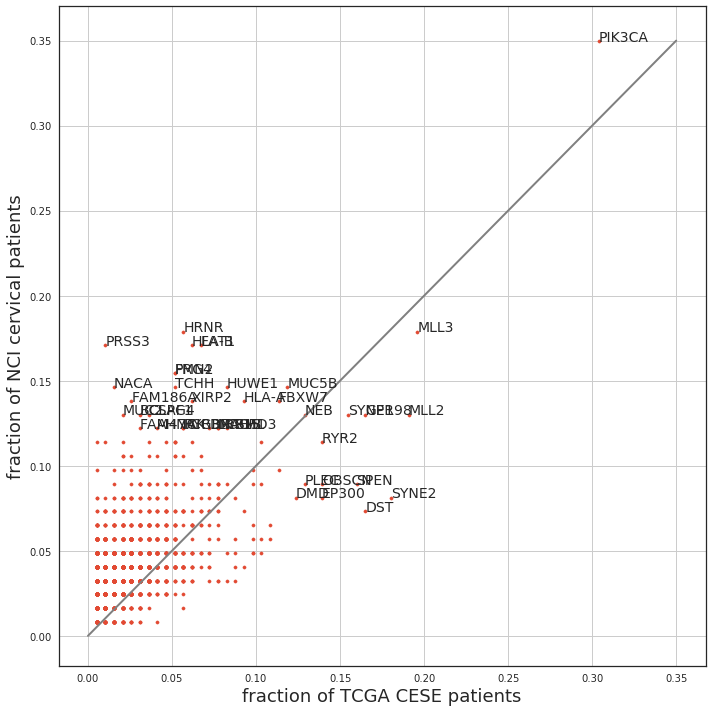

In [138]:

with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w', figsize=(10,10))
    ax = fig.add_subplot(111)
#     fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(x, y, s=10)

    ann = []
    n = len(labels)
    for i in range(n):
        xy = [x[i], y[i]]
        fc = x[i]/y[i]
#         if max(xy) >= 0.12 or fc > 3 or fc < 1/3:
        if max(xy) >= 0.12:
            ann.append(ax.annotate(labels[i], xy = (x[i], y[i]), fontsize=14))
    mask = np.zeros(fig.canvas.get_width_height(), bool)
    plt.tight_layout()
    fig.canvas.draw()

    ax.plot([0,.35], [0,.35], linewidth=2, color='gray')
    for a in ann:
        bbox = a.get_window_extent()
        x0 = int(bbox.x0)
        x1 = int(math.ceil(bbox.x1))
        y0 = int(bbox.y0)
        y1 = int(math.ceil(bbox.y1))

        s = np.s_[x0:x1+1, y0:y1+1]
        if np.any(mask[s]):
            a.set_visible(True)
        else:
            mask[s] = True

    plt.xlabel('fraction of TCGA CESE patients', fontsize=18)
    plt.ylabel('fraction of NCI cervical patients', fontsize=18)
    plt.tight_layout()
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/tcga_nci_percent_patient_mutated.png'
plt.savefig(of, dpi=300)
plt.show()

In [53]:
f3 = '/projects/mwarren_prj/mwarren_prj_results/VDB-235/CESC.tsv'
df3 = pd.read_csv(f3, sep='\t')
df3.head(2)

,gene_id,percent_mutated
0,?|10431,0.515464
1,?|57714,2.061856


In [54]:
df3['gene'] = df3.gene_id.apply(lambda x: x.split('|')[0])

In [57]:
df3 = df3.drop('gene_id', axis=1)

In [58]:
df3.head(2)

,percent_mutated,gene
0,0.515464,?
1,2.061856,?


In [59]:
df3['tcga_freq'] = df3.percent_mutated/100

In [60]:
df3 = df3.drop('percent_mutated', axis=1)

In [61]:
df3.head(2)

,gene,tcga_freq
0,?,0.005155
1,?,0.020619


In [63]:
dfm2 = pd.merge(df3, df_nci, left_on='gene', right_index=True, how='outer')
dfm2.head()

,gene,tcga_freq,patient,freq
0,?,0.005155,NaN,NaN
1,?,0.020619,NaN,NaN
2,A1BG,0.005155,1.0,0.00813
3,A1CF,0.010309,2.0,0.01626
4,A2BP1,0.030928,NaN,NaN


In [66]:
dfm2.set_index('gene', inplace=True)

In [67]:
dfm2.columns = ['tcga_freq', 'nci_patient', 'nci_freq']

In [68]:
dfm2.shape

(17139, 3)

In [73]:
dfm2 = dfm2.dropna().sort_values(['nci_freq', 'tcga_freq'], ascending=False)

In [74]:
dfm2.head()

,tcga_freq,nci_patient,nci_freq
gene,,,
MUC4,0.015464,88.0,0.715447
TTN,0.350515,51.0,0.414634
AHNAK2,0.061856,45.0,0.365854
PIK3CA,0.273196,43.0,0.349593
MUC16,0.144330,35.0,0.284553


In [88]:
labels = dfm2.index.tolist()
x = dfm2.tcga_freq
y = dfm2.nci_freq

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


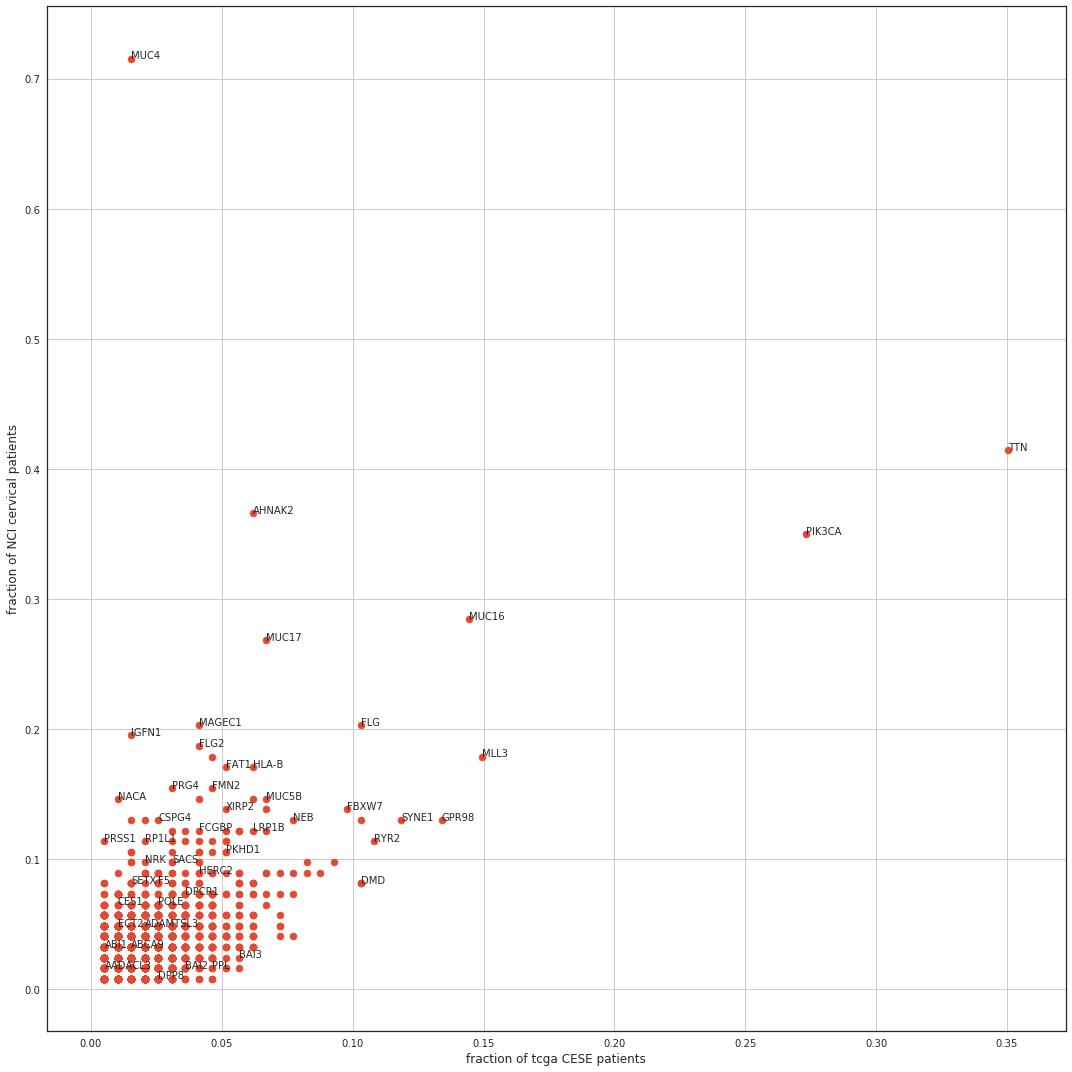

In [89]:
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w', figsize=(15,15))
    ax = fig.add_subplot(111)
#     fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(x, y)

    ann = []
    n = len(labels)
    for i in range(n):
        xy = [x[i], y[i]]
        fc = x[i]/y[i]
        if max(xy) > 0.1 or fc > 2 or fc < 0.5:
            ann.append(ax.annotate(labels[i], xy = (x[i], y[i])))
    mask = np.zeros(fig.canvas.get_width_height(), bool)
    plt.tight_layout()
    fig.canvas.draw()

    for a in ann:
        bbox = a.get_window_extent()
        x0 = int(bbox.x0)
        x1 = int(math.ceil(bbox.x1))
        y0 = int(bbox.y0)
        y1 = int(math.ceil(bbox.y1))

        s = np.s_[x0:x1+1, y0:y1+1]
        if np.any(mask[s]):
            a.set_visible(False)
        else:
            mask[s] = True

    plt.xlabel('fraction of tcga CESE patients')
    plt.ylabel('fraction of NCI cervical patients')
    plt.tight_layout()
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/tcga_nci_percent_patient_mutated_Mya.png'
plt.savefig(of, dpi=300)
plt.show()